
# Prediction Using Decision Tree *Algorithm* 

TASK: INTERMEDIATE TASK-2

Author Name: SARAN D

In [17]:
#Importing the required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Reading the dataset
df = pd.read_csv('/content/Iris.csv')
print(df.shape)

(150, 6)


In [18]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [19]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

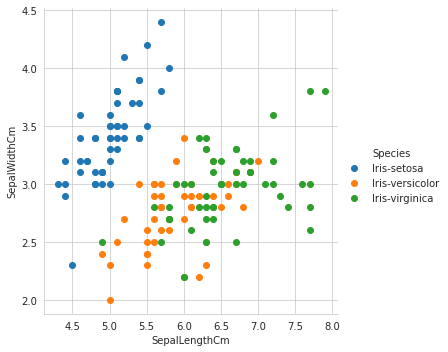

In [21]:
import warnings
warnings.filterwarnings('ignore')
# Visualizing the featues based on target variable.
import seaborn as sns
sns.set_style('whitegrid')
sns.FacetGrid(size = 5,data = df, hue = 'Species').map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm').add_legend()
plt.show();

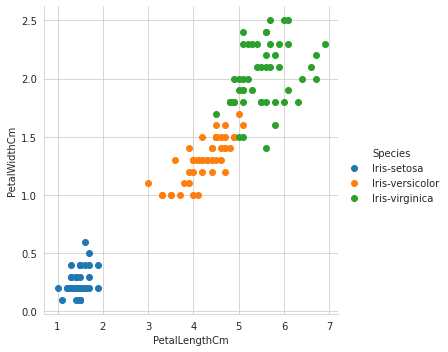

In [22]:
import warnings
warnings.filterwarnings('ignore')
# Visualizing the PetalLengthCm and PetalWidthCm featues based on target variable.
import seaborn as sns
sns.set_style('whitegrid')
sns.FacetGrid(size = 5,data = df, hue = 'Species').map(plt.scatter, 'PetalLengthCm', 'PetalWidthCm').add_legend()
plt.show();

Visualizing Decision Tree
***italicised text***

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score

X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values
#Splitting the data into training set and test set!!!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [24]:

# Using the Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [25]:
#Evaluating the model
from sklearn.metrics import accuracy_score
y_pred = dtree.predict(X_test)
print("Model Accuracy: ", accuracy_score(y_test, y_pred) * 100, '%')

Model Accuracy:  100.0 %


In [26]:
# Training model 
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

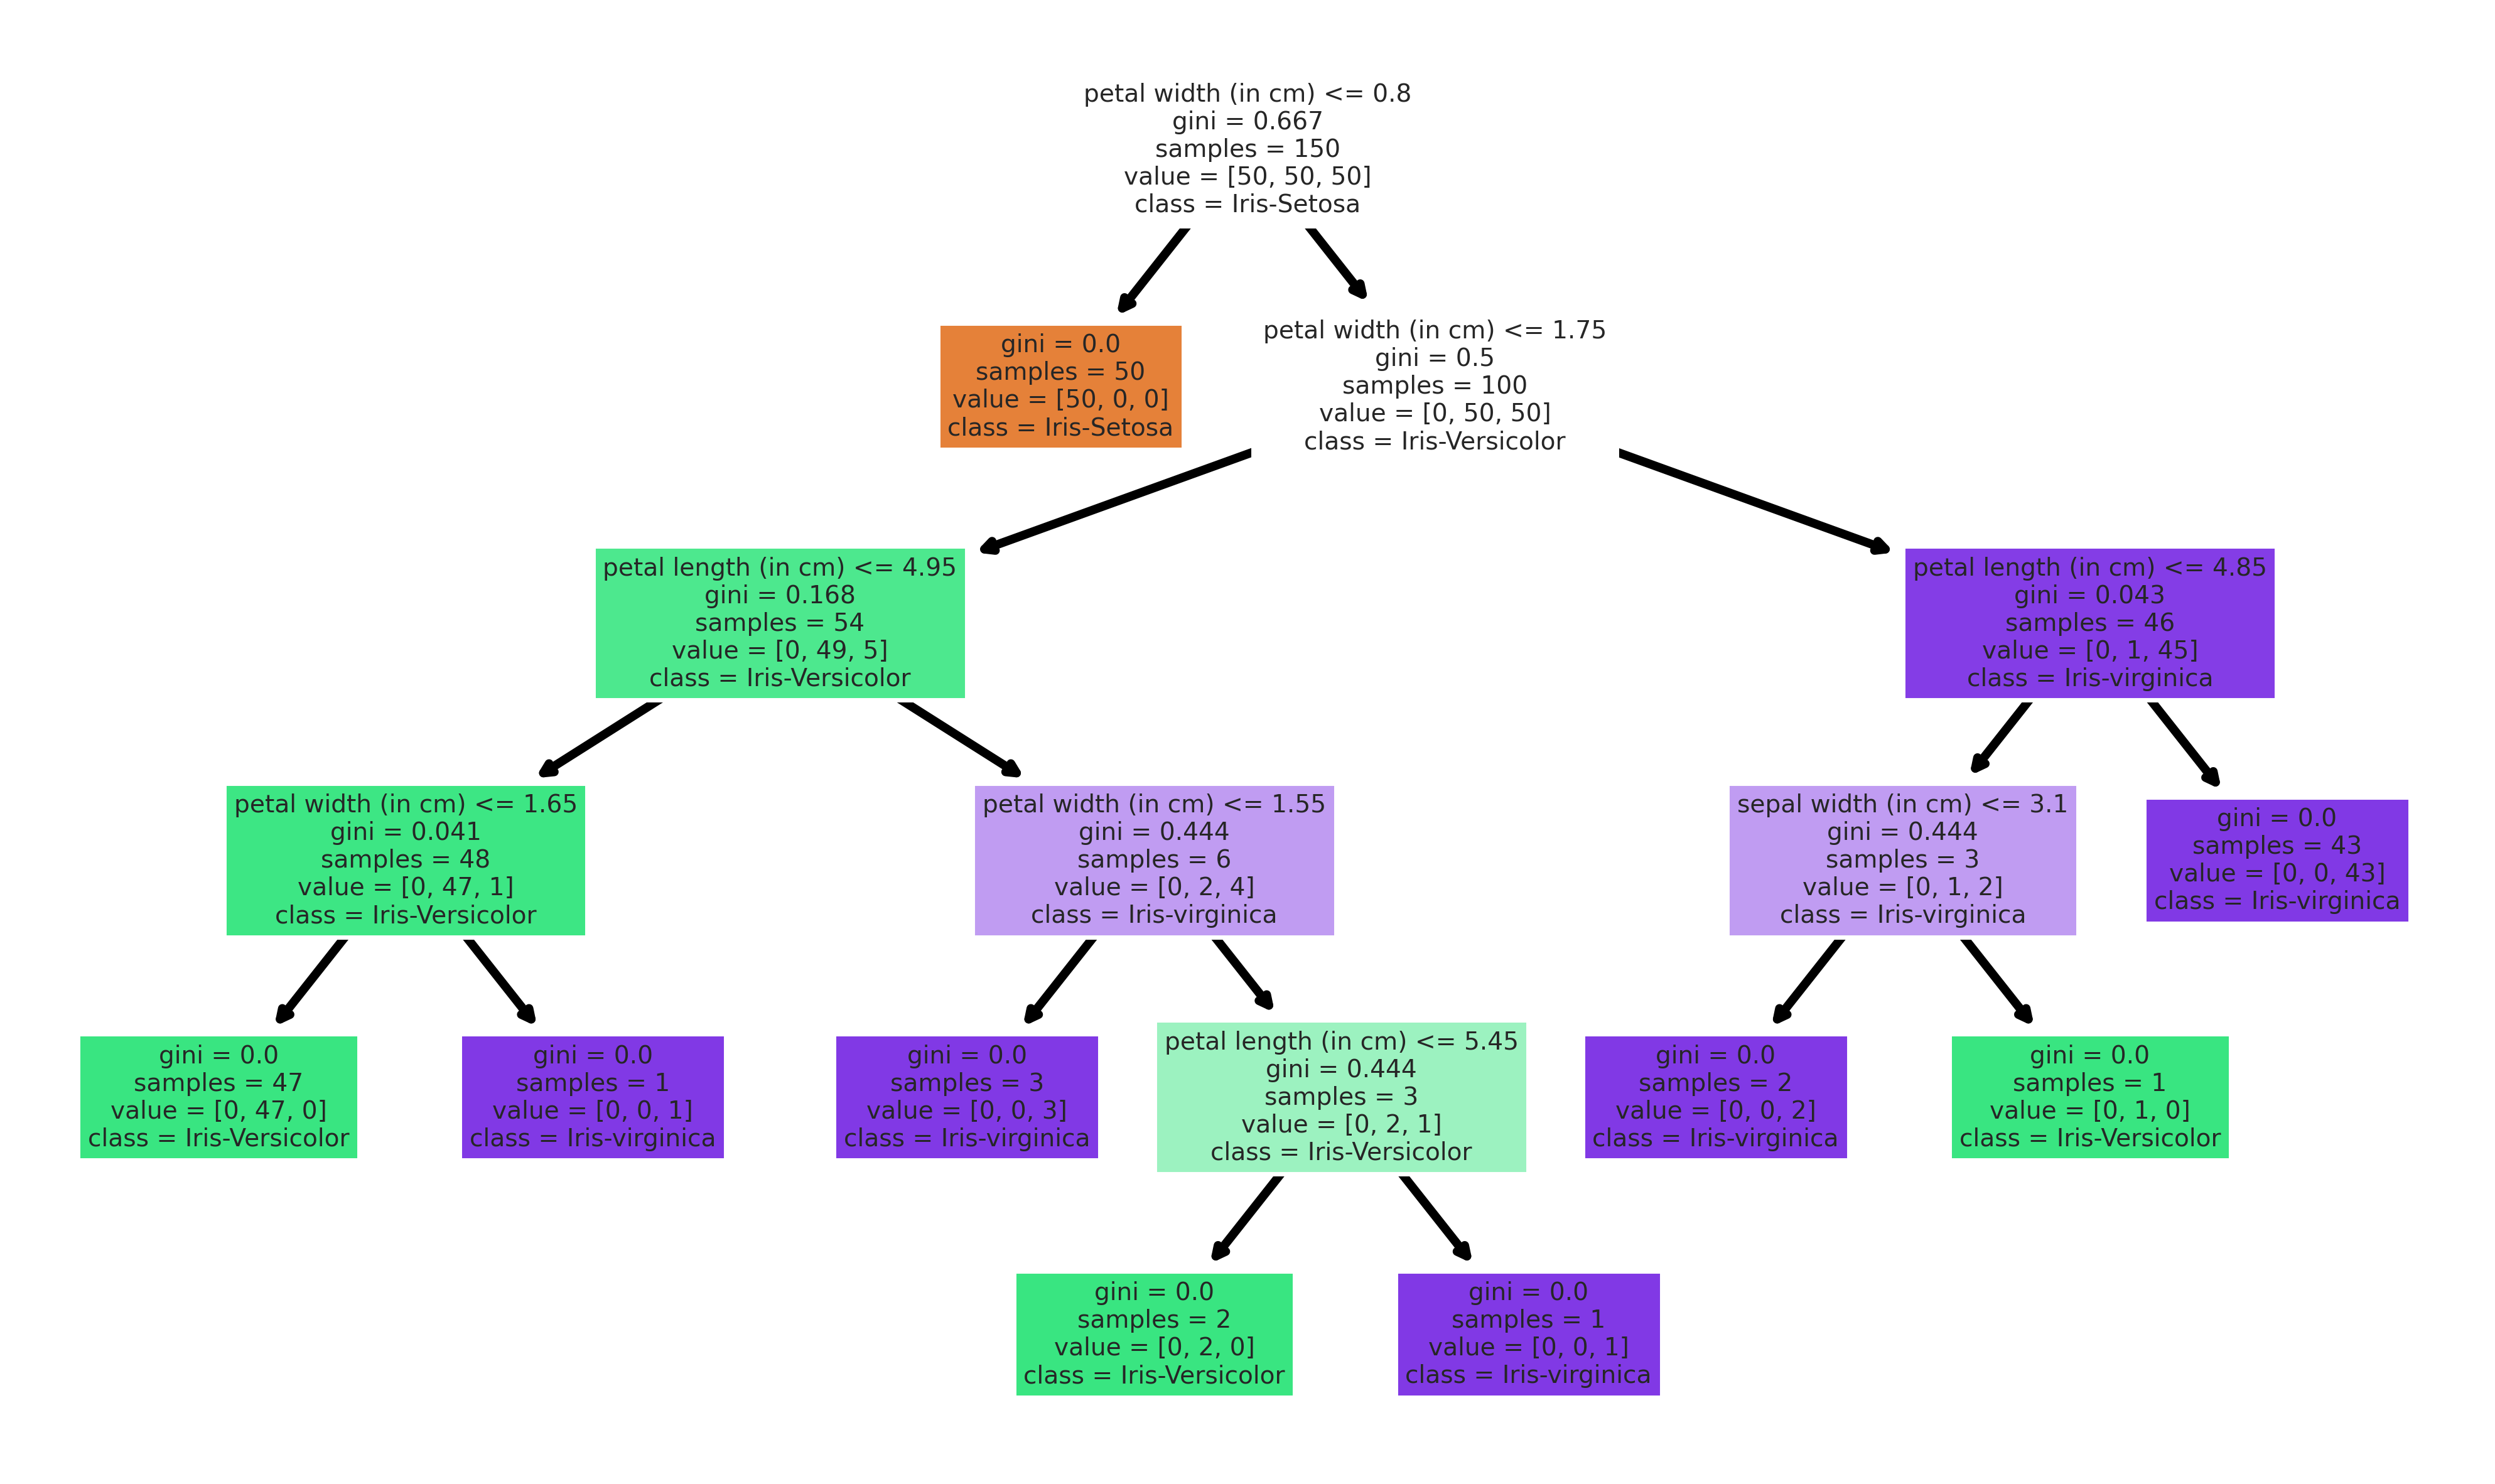

In [27]:
from sklearn.tree import plot_tree

featName=['sepal length ( in cm)','sepal width (in cm)','petal length (in cm)','petal width (in cm)']
clsName=['Iris-Setosa','Iris-Versicolor','Iris-virginica']

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,6), dpi = 500)

out = plot_tree(dtree, feature_names = featName, class_names = clsName, filled = True);
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(2)
fig.savefig('image.png')

***Testing the classifer model with new data***

In [16]:
# The new data points with features similar to Iris setosa is fed
New = np.array([5.0, 3.0, 1.5, 0.5]).reshape(1, -1)
print(dtree.predict(New))

['Iris-setosa']
